In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cifar10_results.csv')

In [3]:
len(df)

6465

In [27]:
# set max column width to 1000
pd.set_option('display.max_colwidth', 1000)

In [23]:

title_font_size = 20
axis_label_font_size = 20
tick_label_font_size = 16

In [24]:
ece_df

,5_bins,10_bins,15_bins,20_bins,25_bins,50_bins,100_bins,200_bins,500_bins,test-accuracy
0,0.244398,0.244397,0.244397,0.244397,0.244397,0.244397,0.244397,0.244481,0.244580,31.26
1,0.415805,0.415805,0.415805,0.415805,0.415805,0.415805,0.415805,0.415805,0.415805,58.26
2,0.255976,0.255976,0.255976,0.255976,0.255976,0.255976,0.255976,0.255976,0.256183,29.92
3,0.308193,0.308193,0.308193,0.308193,0.308193,0.308193,0.308193,0.308193,0.308193,43.98
4,0.201409,0.201409,0.201409,0.201409,0.201409,0.201409,0.201409,0.201468,0.201468,32.34
...,...,...,...,...,...,...,...,...,...,...
6457,0.352697,0.352697,0.352697,0.352697,0.352697,0.352697,0.352697,0.352697,0.352697,44.52
6458,0.282806,0.282806,0.282806,0.282806,0.282806,0.282806,0.282806,0.282806,0.282806,39.06
6459,0.205455,0.205455,0.205455,0.205455,0.205455,0.205455,0.205455,0.205455,0.205457,27.44
6460,0.335164,0.335164,0.335164,0.335164,0.335164,0.335164,0.335164,0.335164,0.335164,42.56


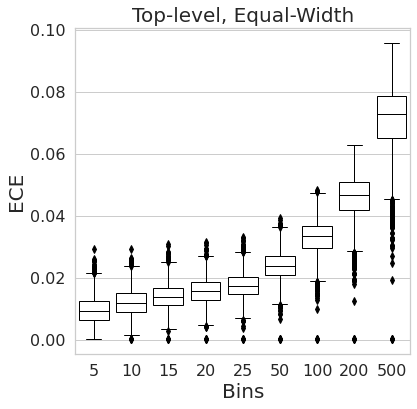

In [28]:
import pandas as pd

# Assuming `df` is your original DataFrame and 'ece' column contains list of dictionaries
# Create an empty DataFrame with desired columns
ece_df = pd.DataFrame(columns=['5_bins', '10_bins', '15_bins', '20_bins', '25_bins', '50_bins', '100_bins', '200_bins', '500_bins','test-accuracy'])

# Iterate through the original DataFrame and extract the relevant information
for index, row in df.iterrows():
    info_data = eval(row['info'])
    ece_data = eval(row['ece'])
    
    bins_data = {}
    for item in ece_data:
        bins_data[f"{item['n_bins']}_bins"] = item['result']
    
    bins_data['test-accuracy'] = info_data['test-accuracy']
    
    # Append the extracted data to the new DataFrame
    ece_df = ece_df.append(bins_data, ignore_index=True)

plot_df = ece_df.loc[ece_df['test-accuracy']>= 60]

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df is the DataFrame with columns '5_bins', '10_bins', '15_bins', etc.
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

# Create a box plot for the ece_df DataFrame
sns.boxplot(data=plot_df.iloc[:, :-1],
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))


# Set plot title and axis labels
plt.title("Top-level, Equal-Width", fontsize=title_font_size)
plt.xlabel("Bins", fontsize=axis_label_font_size)
plt.ylabel("ECE", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
bin_numbers = [col.split('_')[0] for col in plot_df.columns[:-1]]
plt.xticks(range(len(bin_numbers)), bin_numbers,fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

# plt.savefig("fig/cifar10_toplevel_ew_ce.pdf", dpi=300, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

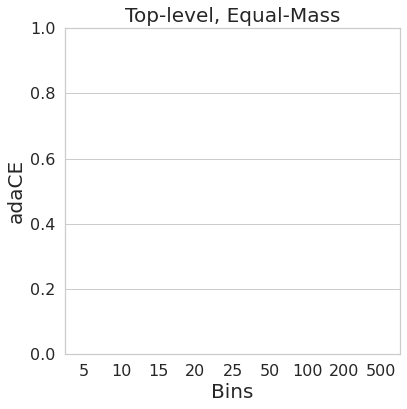

In [7]:
import pandas as pd

# Assuming `df` is your original DataFrame and 'ece' column contains list of dictionaries
# Create an empty DataFrame with desired columns
eceem_df = pd.DataFrame(columns=['5_bins', '10_bins', '15_bins', '20_bins', '25_bins', '50_bins', '100_bins', '200_bins', '500_bins','test-accuracy'])

# Iterate through the original DataFrame and extract the relevant information
for index, row in df.iterrows():
    info_data = eval(row['info'])
    ece_data = eval(row['ECE_em'])
    
    bins_data = {}
    for item in ece_data:
        bins_data[f"{item['num_bins']}_bins"] = item['result']
    
    bins_data['test-accuracy'] = info_data['test-accuracy']
    
    # Append the extracted data to the new DataFrame
    eceem_df = eceem_df.append(bins_data, ignore_index=True)

plot_df = eceem_df.loc[eceem_df['test-accuracy']>= 75]

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df is the DataFrame with columns '5_bins', '10_bins', '15_bins', etc.
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
# Set font sizes

# Create a box plot for the ece_df DataFrame
sns.boxplot(data=plot_df.iloc[:, :-1],
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

# Set plot title and axis labels
plt.title("Top-level, Equal-Mass", fontsize=title_font_size)
plt.xlabel("Bins", fontsize=axis_label_font_size)
plt.ylabel("adaCE", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
bin_numbers = [col.split('_')[0] for col in plot_df.columns[:-1]]
plt.xticks(range(len(bin_numbers)), bin_numbers,fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

plt.savefig("fig/cifar10_toplevel_em_ce.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

In [16]:
df['tace']

0                 {'n_bins': 5, 'threshold': 0.001, 'logits': False, 'result': 0.013999890356221345}, {'n_bins': 10, 'threshold': 0.001, 'logits': False, 'result': 0.0140611050562479}, {'n_bins': 15, 'threshold': 0.001, 'logits': False, 'result': 0.014113805332536455}, {'n_bins': 20, 'threshold': 0.001, 'logits': False, 'result': 0.01414071399256691}, {'n_bins': 25, 'threshold': 0.001, 'logits': False, 'result': 0.014159452933695717}, {'n_bins': 50, 'threshold': 0.001, 'logits': False, 'result': 0.01417878229862522}, {'n_bins': 100, 'threshold': 0.001, 'logits': False, 'result': 0.01421601604860929}, {'n_bins': 200, 'threshold': 0.001, 'logits': False, 'result': 0.014259891940115685}, {'n_bins': 500, 'threshold': 0.001, 'logits': False, 'result': 0.0143962304723}
1                           {'n_bins': 5, 'threshold': 0.001, 'logits': False, 'result': 0.0124318746274989}, {'n_bins': 10, 'threshold': 0.001, 'logits': False, 'result': 0.012503063457224302}, {'n_bins': 15, 'threshold': 0.0

In [11]:
import pandas as pd

# Assuming `df` is your original DataFrame and 'ece' column contains list of dictionaries
# Create an empty DataFrame with desired columns
tace_df = pd.DataFrame(columns=['5_bins', '10_bins', '15_bins', '20_bins', '25_bins', '50_bins', '100_bins', '200_bins', '500_bins','test-accuracy'])

# Iterate through the original DataFrame and extract the relevant information
for index, row in df.iterrows():
    info_data = eval(row['info'])
    tace_data = eval(row['tace'])
    
    bins_data = {}
    for item in tace_data:
        bins_data[f"{item['n_bins']}_bins"] = item['result']
    
    bins_data['test-accuracy'] = info_data['test-accuracy']
    
    # Append the extracted data to the new DataFrame
    tace_df = tace_df.append(bins_data, ignore_index=True)

plot_df = tace_df

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df is the DataFrame with columns '5_bins', '10_bins', '15_bins', etc.
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

# Create a box plot for the ece_df DataFrame
sns.boxplot(data=plot_df.iloc[:, :-1],
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

# Set plot title and axis labels

# Set plot title and axis labels
plt.title("Class-Wise, Equal-Mass", fontsize=title_font_size)
plt.xlabel("Bins", fontsize=axis_label_font_size)
plt.ylabel("cwCE_em", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
bin_numbers = [col.split('_')[0] for col in plot_df.columns[:-1]]
plt.xticks(range(len(bin_numbers)), bin_numbers,fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

plt.savefig("fig/cifar10_classwise_em_ce.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()



NameError: name 'nan' is not defined

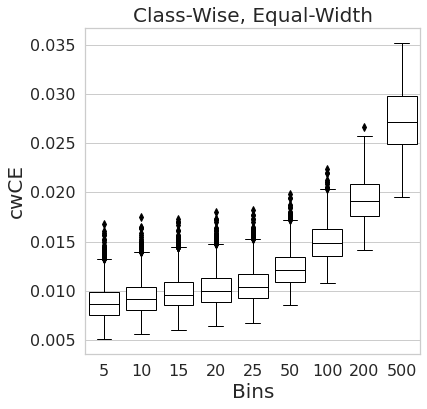

In [ ]:
import pandas as pd

# Assuming `df` is your original DataFrame and 'ece' column contains list of dictionaries
# Create an empty DataFrame with desired columns
cwECE_df = pd.DataFrame(columns=['5_bins', '10_bins', '15_bins', '20_bins', '25_bins', '50_bins', '100_bins', '200_bins', '500_bins','test-accuracy'])

# Iterate through the original DataFrame and extract the relevant information
for index, row in df.iterrows():
    info_data = eval(row['info'])
    cwECE_data = eval(row['cwECE'])
    
    bins_data = {}
    for item in cwECE_data:
        bins_data[f"{item['n_bins']}_bins"] = item['result']
    
    bins_data['test-accuracy'] = info_data['test-accuracy']
    
    # Append the extracted data to the new DataFrame
    cwECE_df = cwECE_df.append(bins_data, ignore_index=True)

plot_df = cwECE_df.loc[cwECE_df['test-accuracy']>= 75]

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df is the DataFrame with columns '5_bins', '10_bins', '15_bins', etc.
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

# Create a box plot for the ece_df DataFrame
sns.boxplot(data=plot_df.iloc[:, :-1],
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))



# Set plot title and axis labels
plt.title("Class-Wise, Equal-Width", fontsize=title_font_size)
plt.xlabel("Bins", fontsize=axis_label_font_size)
plt.ylabel("cwCE", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
bin_numbers = [col.split('_')[0] for col in plot_df.columns[:-1]]
plt.xticks(range(len(bin_numbers)), bin_numbers,fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)


plt.savefig("fig/cifar10_classwise_ew_ce.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()



In [ ]:
ece_df.columns

Index(['5_bins', '10_bins', '15_bins', '20_bins', '25_bins', '50_bins',
       '100_bins', '200_bins', '500_bins', 'test-accuracy',
       'accuracy_bracket'],
      dtype='object')

In [ ]:
eceem_df.columns

Index(['5_bins', '10_bins', '15_bins', '20_bins', '25_bins', '50_bins',
       '100_bins', '200_bins', '500_bins', 'test-accuracy'],
      dtype='object')

/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator


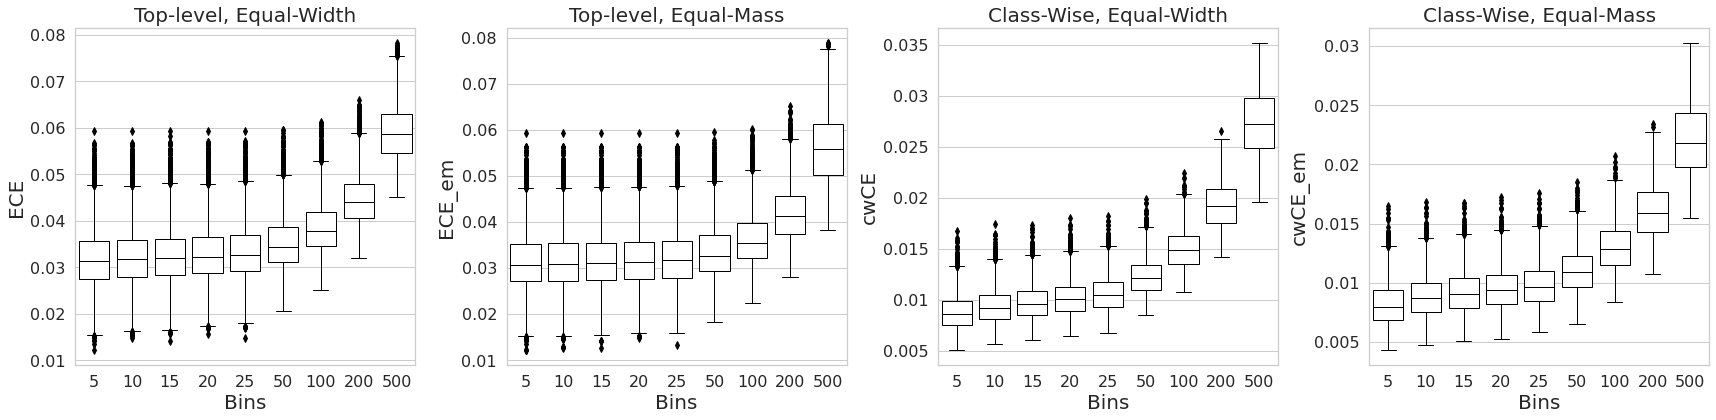

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df, eceem_df, tace_df, cwECE_df are the DataFrames with columns '5_bins', '10_bins', '15_bins', etc.
plot_df_list = [ece_df, eceem_df, cwECE_df, tace_df]
titles = ["Top-level, Equal-Width", "Top-level, Equal-Mass", "Class-Wise, Equal-Width", "Class-Wise, Equal-Mass"]
ylabels = ["ECE", "ECE_em", "cwCE", "cwCE_em"]

# Create a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
sns.set(style="whitegrid")

for i, plot_df in enumerate(plot_df_list):
    col = i
    ax = axes[col]

    # Filter data by test-accuracy
    plot_df_filtered = plot_df.loc[plot_df['test-accuracy'] >= 75].iloc[:, :-1]

    # Create a box plot for the plot_df DataFrame
    sns.boxplot(data=plot_df_filtered,
                ax=ax,
                boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
                capprops=dict(color='black', linewidth=1),
                whiskerprops=dict(color='black', linewidth=1),
                medianprops=dict(color='black', linewidth=1),
                flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

    # Set plot title and axis labels
    ax.set_title(titles[i], fontsize=title_font_size)
    ax.set_xlabel("Bins", fontsize=axis_label_font_size)
    ax.set_ylabel(ylabels[i], fontsize=axis_label_font_size)

    # Modify the x-axis tick labels
    bin_numbers = [col.split('_')[0] for col in plot_df.columns[:-1]]
    ax.set_xticklabels(bin_numbers, fontsize=tick_label_font_size)
    ax.set_yticklabels(ax.get_yticks(), fontsize=tick_label_font_size)

# Adjust spacing between subplots
fig.tight_layout()

# Save the figure
plt.savefig("fig/cifar10_combined_plots_single_row.pdf", dpi=300, format='pdf', bbox_inches='tight')

# Show the figure
plt.show()

/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/younan/anaconda3/envs/pytorch_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator


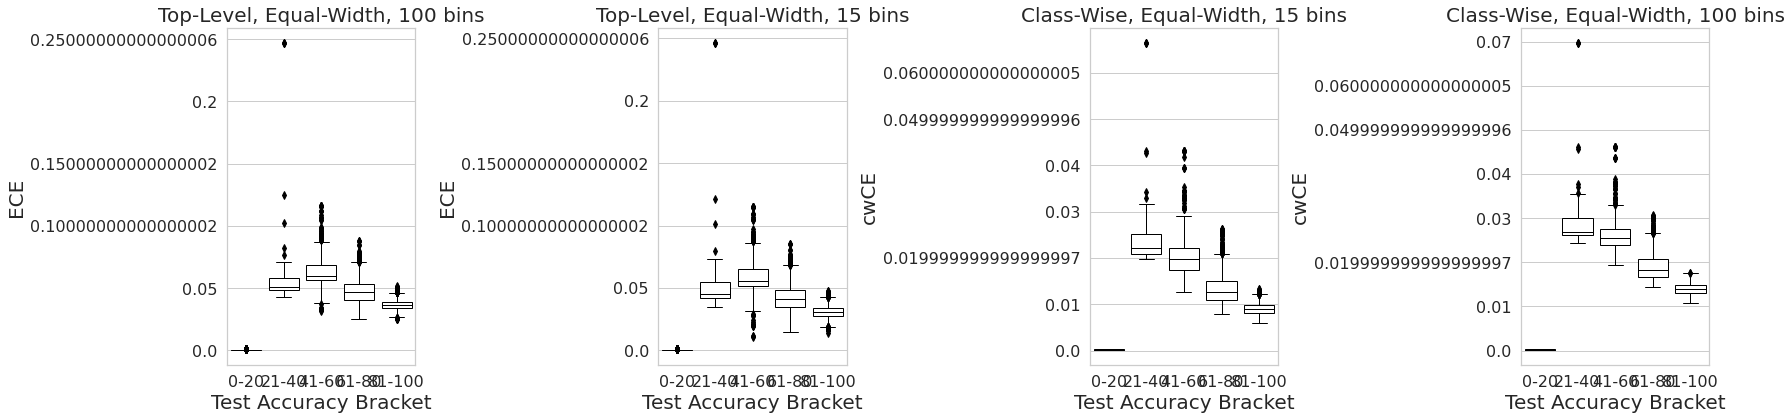

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df and cwECE_df are your dataframes

def categorize_test_accuracy(accuracy):
    if 0 <= accuracy <= 20:
        return '0-20'
    elif 20 < accuracy <= 40:
        return '21-40'
    elif 40 < accuracy <= 60:
        return '41-60'
    elif 60 < accuracy <= 80:
        return '61-80'
    else:
        return '81-100'

ece_df['accuracy_bracket'] = ece_df['test-accuracy'].apply(categorize_test_accuracy)
cwECE_df['accuracy_bracket'] = cwECE_df['test-accuracy'].apply(categorize_test_accuracy)

# Create a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
sns.set(style="whitegrid")

titles = [
    "Top-Level, Equal-Width, 100 bins",
    "Top-Level, Equal-Width, 15 bins",
    "Class-Wise, Equal-Width, 15 bins",
    "Class-Wise, Equal-Width, 100 bins"
]

ylabels = ["ECE", "ECE", "cwCE", "cwCE"]
bins = ['100_bins', '15_bins', '15_bins', '100_bins']
dataframes = [ece_df, ece_df, cwECE_df, cwECE_df]

for i, (df, bin_col) in enumerate(zip(dataframes, bins)):
    ax = axes[i]

    plot_data = []
    for bracket in ['0-20', '21-40', '41-60', '61-80', '81-100']:
        plot_data.append(df.loc[df['accuracy_bracket'] == bracket, bin_col])

    sns.boxplot(data=plot_data,
                ax=ax,
                boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
                capprops=dict(color='black', linewidth=1),
                whiskerprops=dict(color='black', linewidth=1),
                medianprops=dict(color='black', linewidth=1),
                flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

    ax.set_title(titles[i], fontsize=title_font_size)
    ax.set_xlabel("Test Accuracy Bracket", fontsize=axis_label_font_size)
    ax.set_ylabel(ylabels[i], fontsize=axis_label_font_size)

    ax.set_xticklabels(['0-20', '21-40', '41-60', '61-80', '81-100'], fontsize=tick_label_font_size)
    ax.set_yticklabels(['{:.2f}'.format(tick) for tick in ax.get_yticks()], fontsize=tick_label_font_size)

# Adjust spacing between subplots
fig.tight_layout()

# Save the figure
plt.savefig("fig/cifar10_new_combined_plots_single_row.pdf", dpi=300, format='pdf', bbox_inches='tight')

# Show the figure
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df is your dataframe

# Create a new column to categorize test accuracy into 5 brackets
def categorize_test_accuracy(accuracy):
    if 0 <= accuracy <= 20:
        return '0-20'
    elif 20 < accuracy <= 40:
        return '21-40'
    elif 40 < accuracy <= 60:
        return '41-60'
    elif 60 < accuracy <= 80:
        return '61-80'
    else:
        return '81-100'

ece_df['accuracy_bracket'] = ece_df['test-accuracy'].apply(categorize_test_accuracy)

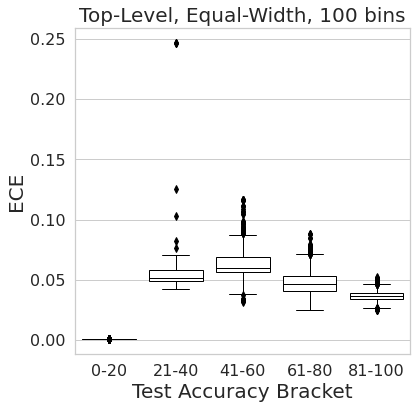

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = []
for bracket in ['0-20', '21-40', '41-60', '61-80', '81-100']:
    plot_data.append(ece_df.loc[ece_df['accuracy_bracket'] == bracket, '100_bins'])

# Creating the box plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

sns.boxplot(data=plot_data,
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

# Set font sizes

# Set plot title and axis labels
plt.title("Top-Level, Equal-Width, 100 bins", fontsize=title_font_size)
plt.xlabel("Test Accuracy Bracket", fontsize=axis_label_font_size)
plt.ylabel("ECE", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
plt.xticks(range(len(['0-20', '21-40', '41-60', '61-80', '81-100'])), ['0-20', '21-40', '41-60', '61-80', '81-100'],fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

plt.savefig("fig/cifar10_100_bins_TopLevelEWBCE_on_different_Accuracy.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

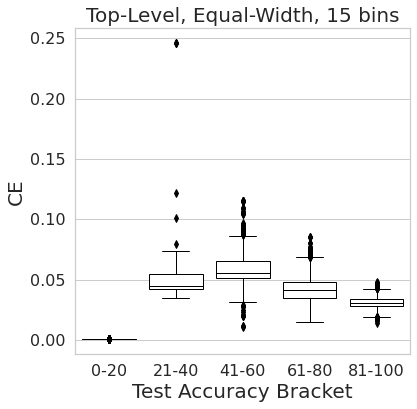

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = []
for bracket in ['0-20', '21-40', '41-60', '61-80', '81-100']:
    plot_data.append(ece_df.loc[ece_df['accuracy_bracket'] == bracket, '15_bins'])

# Creating the box plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

sns.boxplot(data=plot_data,
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))


# Set plot title and axis labels
plt.title("Top-Level, Equal-Width, 15 bins", fontsize=title_font_size)
plt.xlabel("Test Accuracy Bracket", fontsize=axis_label_font_size)
plt.ylabel("CE", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
plt.xticks(range(len(['0-20', '21-40', '41-60', '61-80', '81-100'])), ['0-20', '21-40', '41-60', '61-80', '81-100'],fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

plt.savefig("fig/cifar10_15_bins_TopLevelEWBCE_on_different_Accuracy.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

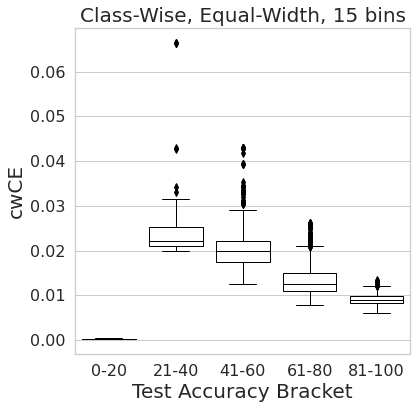

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df is your dataframe

# Create a new column to categorize test accuracy into 5 brackets
def categorize_test_accuracy(accuracy):
    if 0 <= accuracy <= 20:
        return '0-20'
    elif 20 < accuracy <= 40:
        return '21-40'
    elif 40 < accuracy <= 60:
        return '41-60'
    elif 60 < accuracy <= 80:
        return '61-80'
    else:
        return '81-100'

cwECE_df['accuracy_bracket'] = cwECE_df['test-accuracy'].apply(categorize_test_accuracy)

import seaborn as sns
import matplotlib.pyplot as plt

plot_data = []
for bracket in ['0-20', '21-40', '41-60', '61-80', '81-100']:
    plot_data.append(cwECE_df.loc[cwECE_df['accuracy_bracket'] == bracket, '15_bins'])

# Creating the box plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

sns.boxplot(data=plot_data,
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

plt.title("Class-Wise, Equal-Width, 15 bins", fontsize=title_font_size)
plt.xlabel("Test Accuracy Bracket", fontsize=axis_label_font_size)
plt.ylabel("cwCE", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
plt.xticks(range(len(['0-20', '21-40', '41-60', '61-80', '81-100'])), ['0-20', '21-40', '41-60', '61-80', '81-100'],fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

plt.savefig("fig/cifar10_15_bins_cwEWBCE_on_different_Accuracy.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

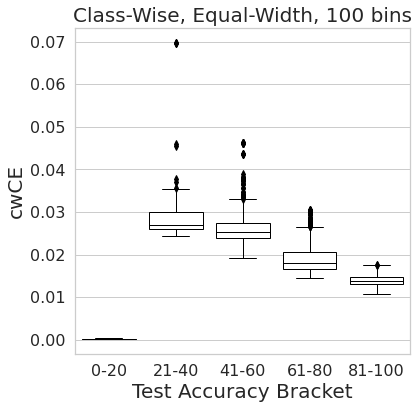

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ece_df is your dataframe

# Create a new column to categorize test accuracy into 5 brackets
def categorize_test_accuracy(accuracy):
    if 0 <= accuracy <= 20:
        return '0-20'
    elif 20 < accuracy <= 40:
        return '21-40'
    elif 40 < accuracy <= 60:
        return '41-60'
    elif 60 < accuracy <= 80:
        return '61-80'
    else:
        return '81-100'

cwECE_df['accuracy_bracket'] = cwECE_df['test-accuracy'].apply(categorize_test_accuracy)

import seaborn as sns
import matplotlib.pyplot as plt

plot_data = []
for bracket in ['0-20', '21-40', '41-60', '61-80', '81-100']:
    plot_data.append(cwECE_df.loc[cwECE_df['accuracy_bracket'] == bracket, '100_bins'])

# Creating the box plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

sns.boxplot(data=plot_data,
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

plt.title("Class-Wise, Equal-Width, 100 bins", fontsize=title_font_size)
plt.xlabel("Test Accuracy Bracket", fontsize=axis_label_font_size)
plt.ylabel("cwCE", fontsize=axis_label_font_size)

# Modify the x-axis tick labels
plt.xticks(range(len(['0-20', '21-40', '41-60', '61-80', '81-100'])), ['0-20', '21-40', '41-60', '61-80', '81-100'],fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

plt.savefig("fig/cifar10_100_bins_cwEWBCE_on_different_Accuracy.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()